In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('data/done/ml_data.csv', encoding='cp949')

In [3]:
data

,단위생산량,avg기온,max기온,min기온,강수량,상대습도,min상대습도,일조시간,avg풍속,max풍속,...,sp_min기온,sp_강수량,su_평균기온,su_max기온,su_min기온,su_강수량,fa_평균기온,fa_max기온,fa_min기온,fa_강수량
0,1895.0,19.2,24.6,14.8,127.6,65.7,41.1,177.8,8.2,16.6,...,5.2,88.0,22.0,27.4,17.7,77.8,23.6,28.6,19.9,242.0
1,1946.0,19.1,26.0,14.7,87.6,64.6,43.6,206.5,7.7,12.7,...,3.6,74.8,21.5,28.7,18.2,93.2,23.6,30.7,20.5,92.0
2,1946.0,19.1,24.9,14.2,151.4,68.0,41.4,169.2,7.4,14.7,...,5.2,102.8,22.3,28.0,17.2,59.8,22.2,27.2,18.7,337.5
3,1955.0,18.4,24.9,12.9,111.1,67.1,43.9,176.5,7.3,13.7,...,2.9,78.9,21.4,27.8,15.9,114.7,22.6,28.5,18.2,137.9
4,1946.0,19.5,25.5,14.4,140.8,71.6,20.4,199.4,2.2,9.8,...,4.8,112.0,22.4,28.5,17.0,86.5,24.0,29.5,20.0,251.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,1708.0,19.5,25.8,13.9,99.6,62.3,18.9,190.4,1.5,7.1,...,3.6,54.6,22.6,28.8,17.0,161.1,24.2,29.8,19.6,52.4
217,1726.0,18.7,25.1,12.9,136.3,62.7,18.0,214.7,1.5,7.0,...,2.5,47.0,22.5,28.8,16.7,180.1,22.4,27.9,17.8,160.1
218,1722.0,19.4,25.7,13.8,159.1,66.3,20.7,210.4,1.6,6.8,...,3.5,91.5,22.6,28.7,17.3,130.9,23.8,29.6,19.0,269.1
219,1965.0,18.5,24.7,12.8,84.5,67.1,21.3,199.4,1.4,7.1,...,2.0,43.2,21.7,28.0,15.7,78.8,23.6,28.7,19.2,134.2


In [4]:
random_state = 0

In [5]:
ori_y = data['단위생산량']
data['단위생산량'] = np.log1p(data['단위생산량'])
# 추후 결괏값을 expm1()으로 환원하여 실제 생산량으로!

# 선형회귀

In [6]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [7]:
def get_rmse(model):
    from sklearn.metrics import mean_squared_error
    pred = model.predict(X_test)
    mse = mean_squared_error(y_test, pred)
    rmse = np.sqrt(mse)
    print(model.__class__.__name__, '로그 변환된 RMSE:', np.round(rmse, 4))
    return rmse

def get_rmses(models):
    rmses = []
    for model in models:
        rmse = get_rmse(model)
        rmses.append(rmse)
    return rmses

In [8]:
y = data['단위생산량']
X = data.drop(columns='단위생산량')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

In [9]:
# LinearRegression, Ridge, Lasso 학습, 예측, 평가
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)
eln_reg = ElasticNet()
eln_reg.fit(X_train, y_train)

models = [lr_reg, ridge_reg, lasso_reg, eln_reg]
get_rmses(models)

LinearRegression 로그 변환된 RMSE: 0.1915
Ridge 로그 변환된 RMSE: 0.1918
Lasso 로그 변환된 RMSE: 0.1936
ElasticNet 로그 변환된 RMSE: 0.192


[0.19146799717800395,
 0.19181112773751108,
 0.19361583922205094,
 0.19197561704386965]

## 피처별 회귀 계수 시각화

In [10]:
def get_top_bottom_coef(model, n=10):
    coef = pd.Series(model.coef_, index=X.columns)
    
    coef_high = coef.sort_values(ascending=False).head(n)
    coef_low = coef.sort_values(ascending=False).tail(n)
    return coef_high, coef_low

In [11]:
def visualize_coef(models):
    fig, axs = plt.subplots(figsize=(20, 15), nrows=2, ncols=2)
    fig.tight_layout()
    
    for idx, model in enumerate(models):
        coef_high, coef_low = get_top_bottom_coef(model)
        coef_concat = pd.concat([coef_high, coef_low])
        
        row = int(idx / 2)
        col = idx % 2
        
        axs[row][col].set_title(model.__class__.__name__+'Coefficents', size=25)
        axs[row][col].tick_params(axis='y', direction='in', pad=-120)
        for label in (axs[row][col].get_xticklabels() + axs[row][col].get_yticklabels()):
            label.set_fontsize(20)
        sns.barplot(x=coef_concat.values, y=coef_concat.index, ax=axs[row][col])

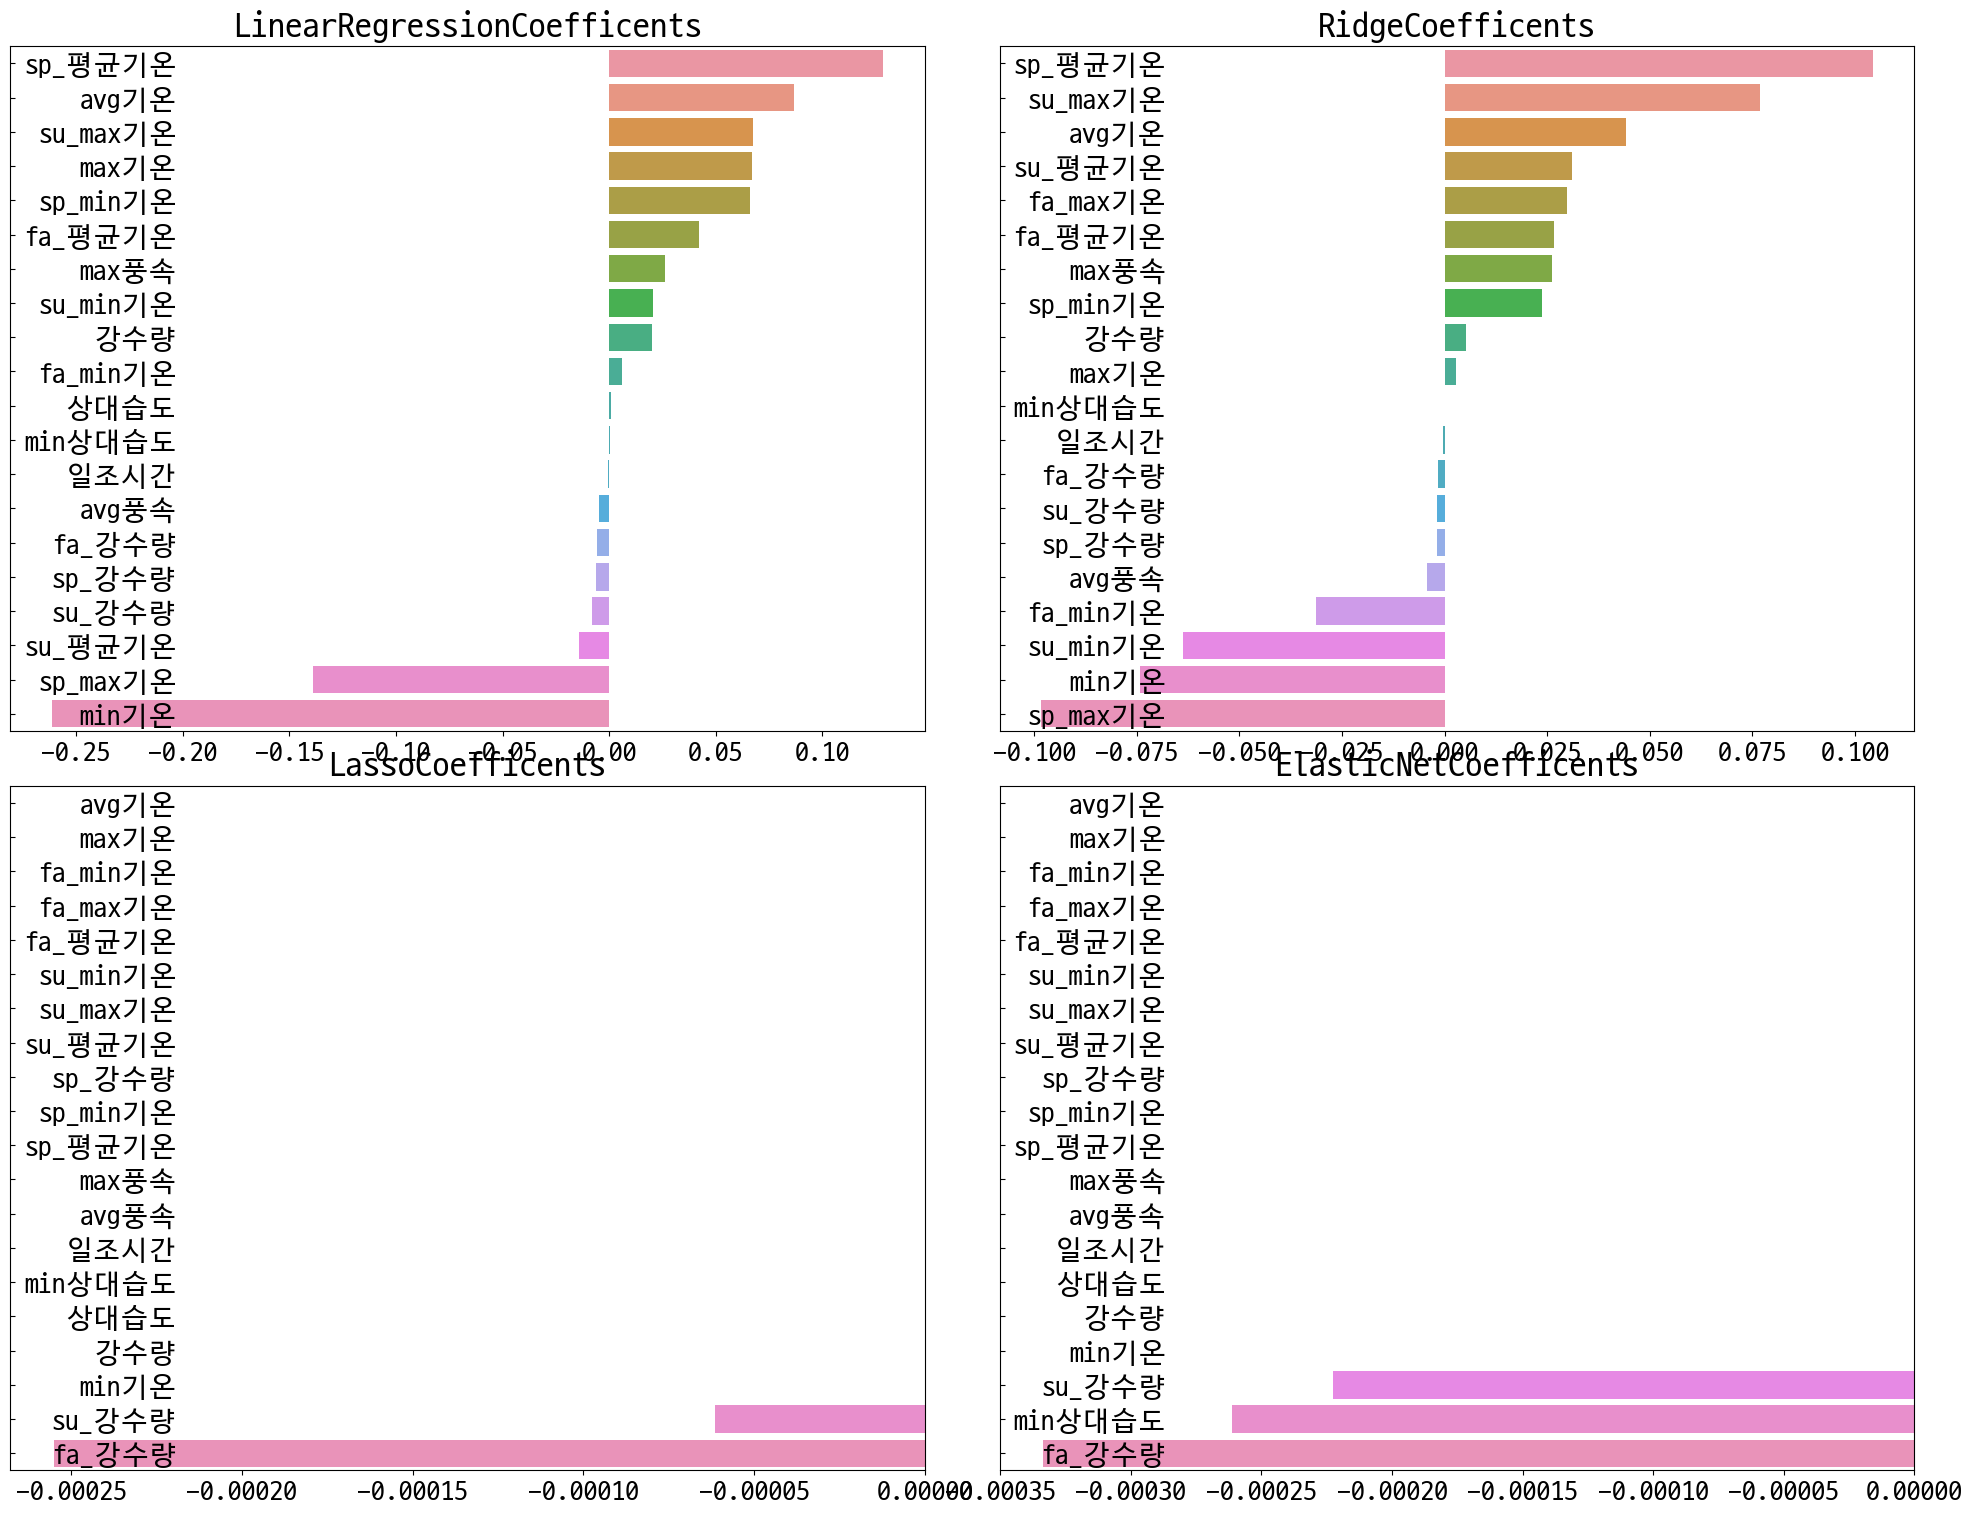

In [12]:
models = [lr_reg, ridge_reg, lasso_reg, eln_reg]
visualize_coef(models)

## 교차 검증

In [13]:
from sklearn.model_selection import cross_val_score

In [14]:
def get_avg_rmse_cv(models):
    for model in models:
        rmse_list = np.sqrt(-1*cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5))
        rmse_avg = np.mean(rmse_list)
        print(f'\n{model.__class__.__name__} CV RMSE 값 리스트: {np.round(rmse_list, 3)}')
        print(f'{model.__class__.__name__} CV 평균 RMSE 값: {np.round(rmse_avg, 3)}')

In [15]:
models = [ridge_reg, lasso_reg, eln_reg]
get_avg_rmse_cv(models)


Ridge CV RMSE 값 리스트: [0.279 0.159 0.298 0.346 0.368]
Ridge CV 평균 RMSE 값: 0.29

Lasso CV RMSE 값 리스트: [0.173 0.144 0.305 0.301 0.272]
Lasso CV 평균 RMSE 값: 0.239

ElasticNet CV RMSE 값 리스트: [0.175 0.144 0.304 0.302 0.272]
ElasticNet CV 평균 RMSE 값: 0.239


## 하이퍼 파라미터 튜닝

In [16]:
from sklearn.model_selection import GridSearchCV

In [17]:
def print_best_params(model, params):
    grid_model = GridSearchCV(model, param_grid=params, scoring='neg_mean_squared_error', cv=5)
    grid_model.fit(X, y)
    rmse = np.sqrt(-1*grid_model.best_score_)
    print(f'{model.__class__.__name__} 5 CV 시 최적 평균 RMSE 값: {np.round(rmse, 4)}, 최적 alpha:{grid_model.best_params_}')

In [18]:
ridge_params = {'alpha':[100000, 200000, 300000, 400000, 500000, 600000]}
lasso_params = {'alpha':[0.67, 1, 10, 100, 2000, 3000, 4000]}
elastic_params = {'alpha':[0.5, 0.45, 1, 10, 100, 800, 1000, 2000, 3000, 5000],
                  'l1_ratio':[0.1, 0.3, 0.5, 0.59, 0.7]
                 }
best_ridge = print_best_params(ridge_reg, ridge_params)
best_lasso = print_best_params(lasso_reg, lasso_params)
best_elastic = print_best_params(eln_reg, elastic_params)

Ridge 5 CV 시 최적 평균 RMSE 값: 0.2475, 최적 alpha:{'alpha': 300000}
Lasso 5 CV 시 최적 평균 RMSE 값: 0.2481, 최적 alpha:{'alpha': 0.67}
ElasticNet 5 CV 시 최적 평균 RMSE 값: 0.2472, 최적 alpha:{'alpha': 0.45, 'l1_ratio': 0.59}


In [19]:
# 최적 하이퍼 파라미터 적용
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
ridge_reg = Ridge(alpha=300000)
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso(alpha=0.67)
lasso_reg.fit(X_train, y_train)
eln_reg = ElasticNet(alpha=0.45, l1_ratio=0.59)
eln_reg.fit(X_train, y_train)

models = [lr_reg, ridge_reg, lasso_reg, eln_reg]
get_rmses(models)

LinearRegression 로그 변환된 RMSE: 0.1915
Ridge 로그 변환된 RMSE: 0.191
Lasso 로그 변환된 RMSE: 0.1927
ElasticNet 로그 변환된 RMSE: 0.1897


[0.19146799717800395,
 0.19096747795885832,
 0.19267964998253423,
 0.18965431085895165]

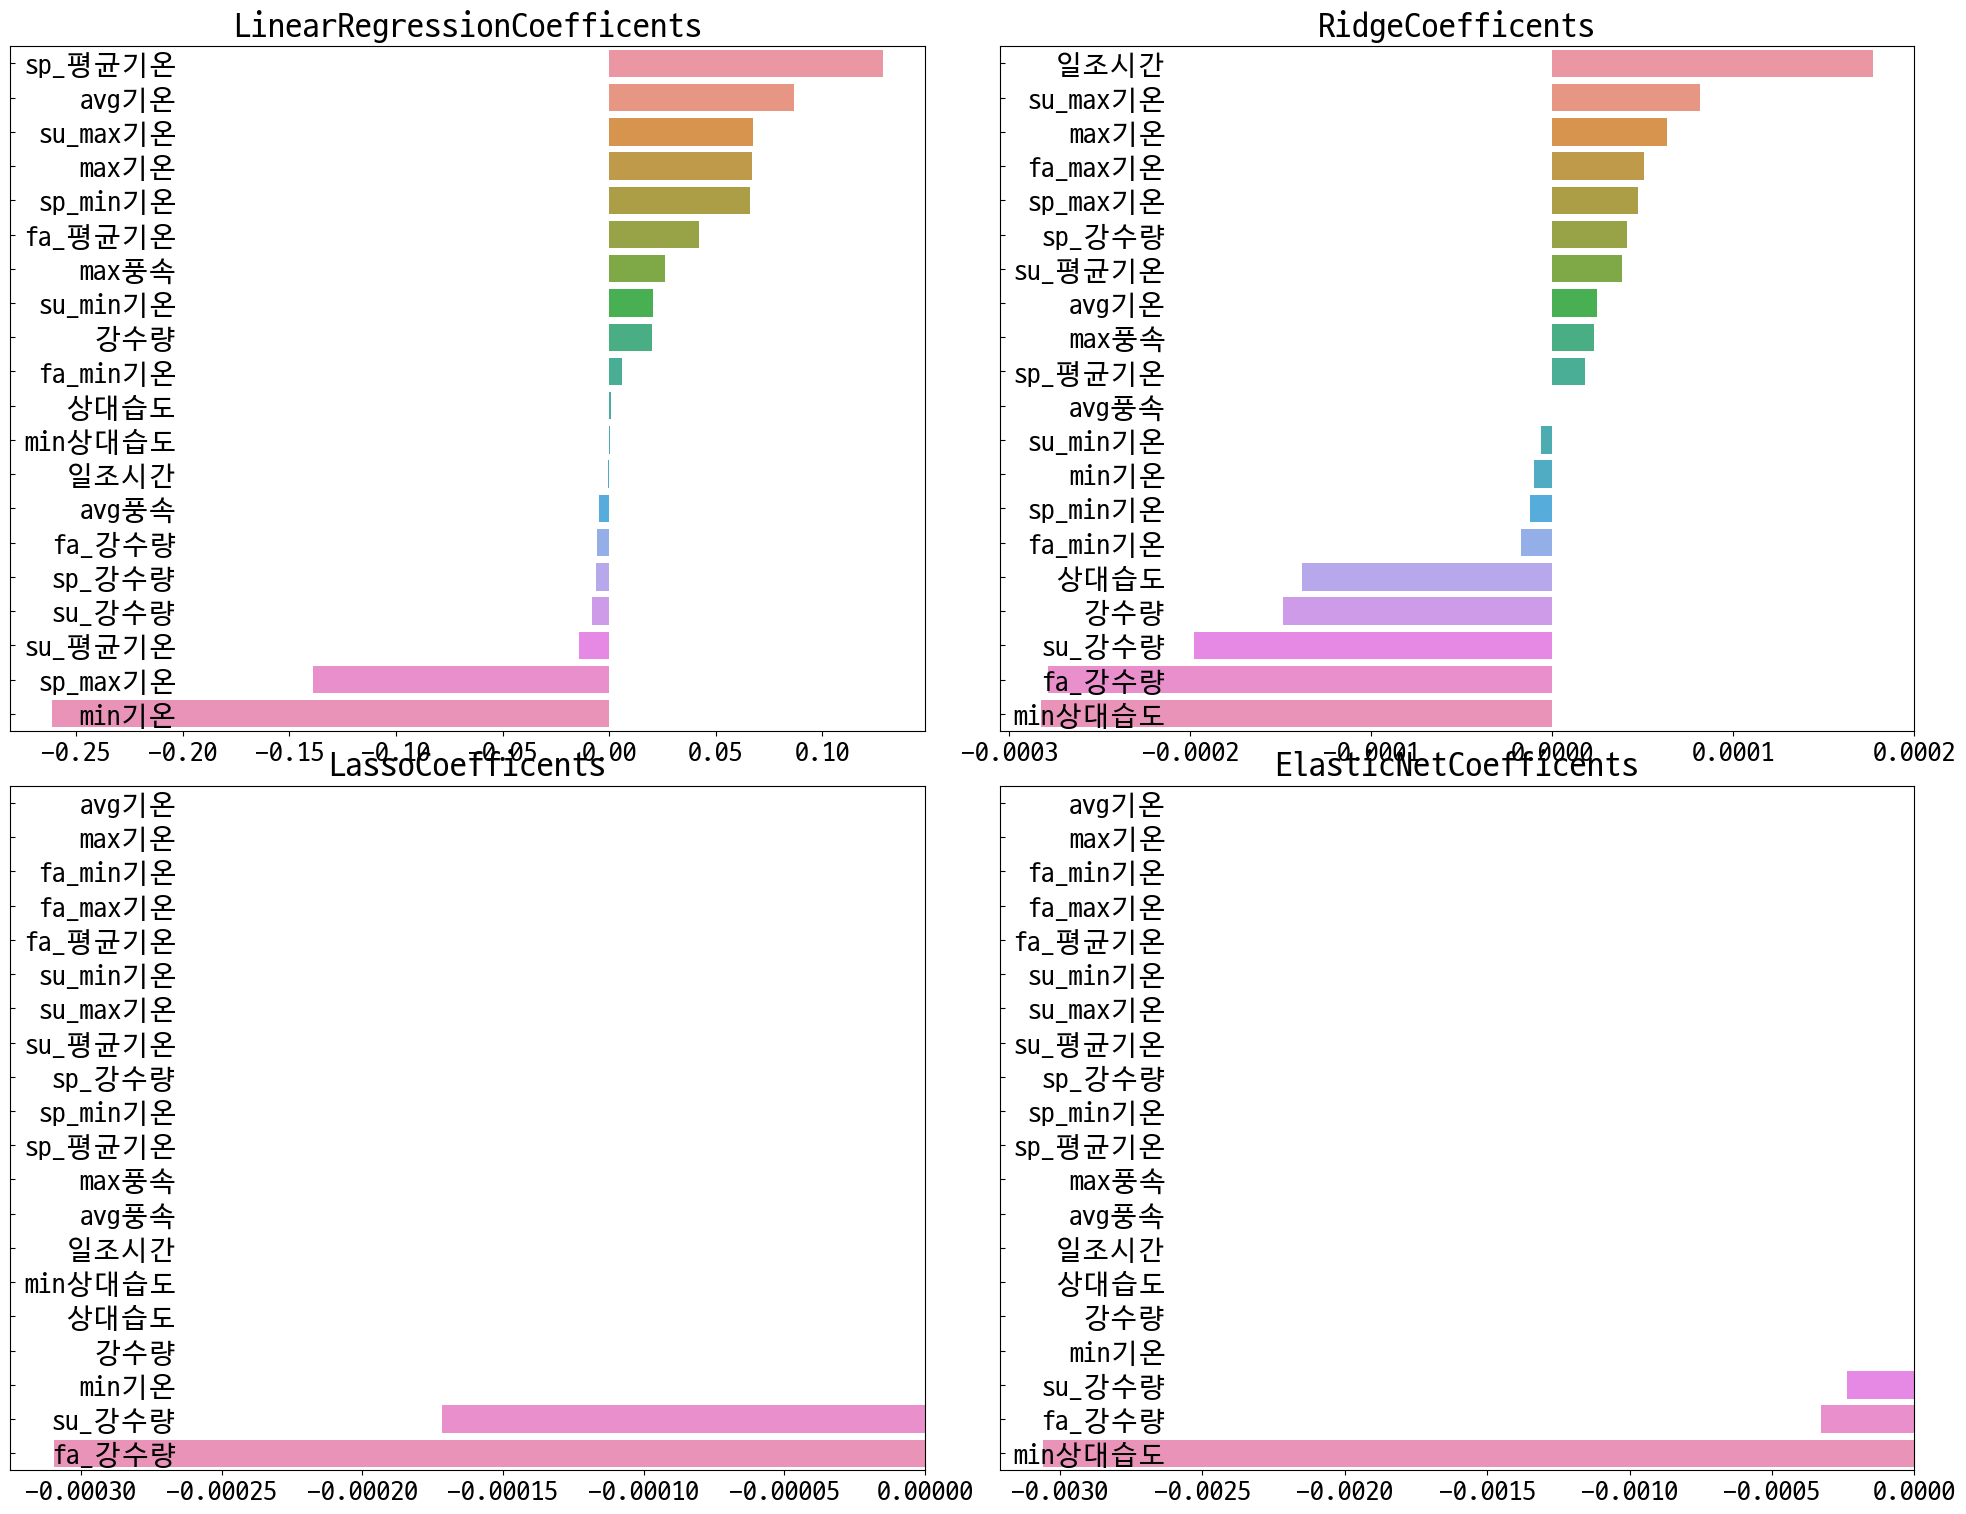

In [20]:
models = [lr_reg, ridge_reg, lasso_reg, eln_reg]
visualize_coef(models)

## 피처 데이터 세트 분포 확인

In [21]:
from scipy.stats import skew

In [22]:
features_idx = data.dtypes[data.dtypes != 'object'].index
skew_features = data[features_idx].apply(lambda x: skew(x))

skew_features_top = skew_features[skew_features > 1]
print(skew_features_top.sort_values())

min상대습도    1.722573
avg풍속      4.487160
dtype: float64


In [23]:
data[skew_features_top.index] = np.log1p(data[skew_features_top.index])

In [24]:
y = data['단위생산량']
X = data.drop(columns='단위생산량')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

ridge_params = {'alpha':[400000, 500000, 600000]}
lasso_params = {'alpha':[0.6, 0.66, 0.665, 0.67, 0.675, 0.68, 0.69, 0.7]}
elastic_params = {'alpha':[0.1, 0.3, 0.4, 0.45, 0.5, 0.6, 1, 1.1, 1.2, 10],
                  'l1_ratio':[0.3, 0.4, 0.5, 0.58, 0.59, 0.6, 0.61, 0.62, 0.7]
                 }
best_rige = print_best_params(ridge_reg, ridge_params)
best_lasso = print_best_params(lasso_reg, lasso_params)
best_elastic = print_best_params(eln_reg, elastic_params)

Ridge 5 CV 시 최적 평균 RMSE 값: 0.2478, 최적 alpha:{'alpha': 500000}
Lasso 5 CV 시 최적 평균 RMSE 값: 0.2481, 최적 alpha:{'alpha': 0.67}
ElasticNet 5 CV 시 최적 평균 RMSE 값: 0.2481, 최적 alpha:{'alpha': 1.1, 'l1_ratio': 0.61}


In [25]:
# 최적 하이퍼 파라미터 적용
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
ridge_reg = Ridge(alpha=500000)
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso(alpha=0.67)
lasso_reg.fit(X_train, y_train)
eln_reg = ElasticNet(alpha=1.1, l1_ratio=0.61)
eln_reg.fit(X_train, y_train)

models = [lr_reg, ridge_reg, lasso_reg, eln_reg]
get_rmses(models)

LinearRegression 로그 변환된 RMSE: 0.1903
Ridge 로그 변환된 RMSE: 0.1917
Lasso 로그 변환된 RMSE: 0.1927
ElasticNet 로그 변환된 RMSE: 0.1927


[0.1902962619650109,
 0.1916800088415023,
 0.19267964998253423,
 0.19268226192207263]

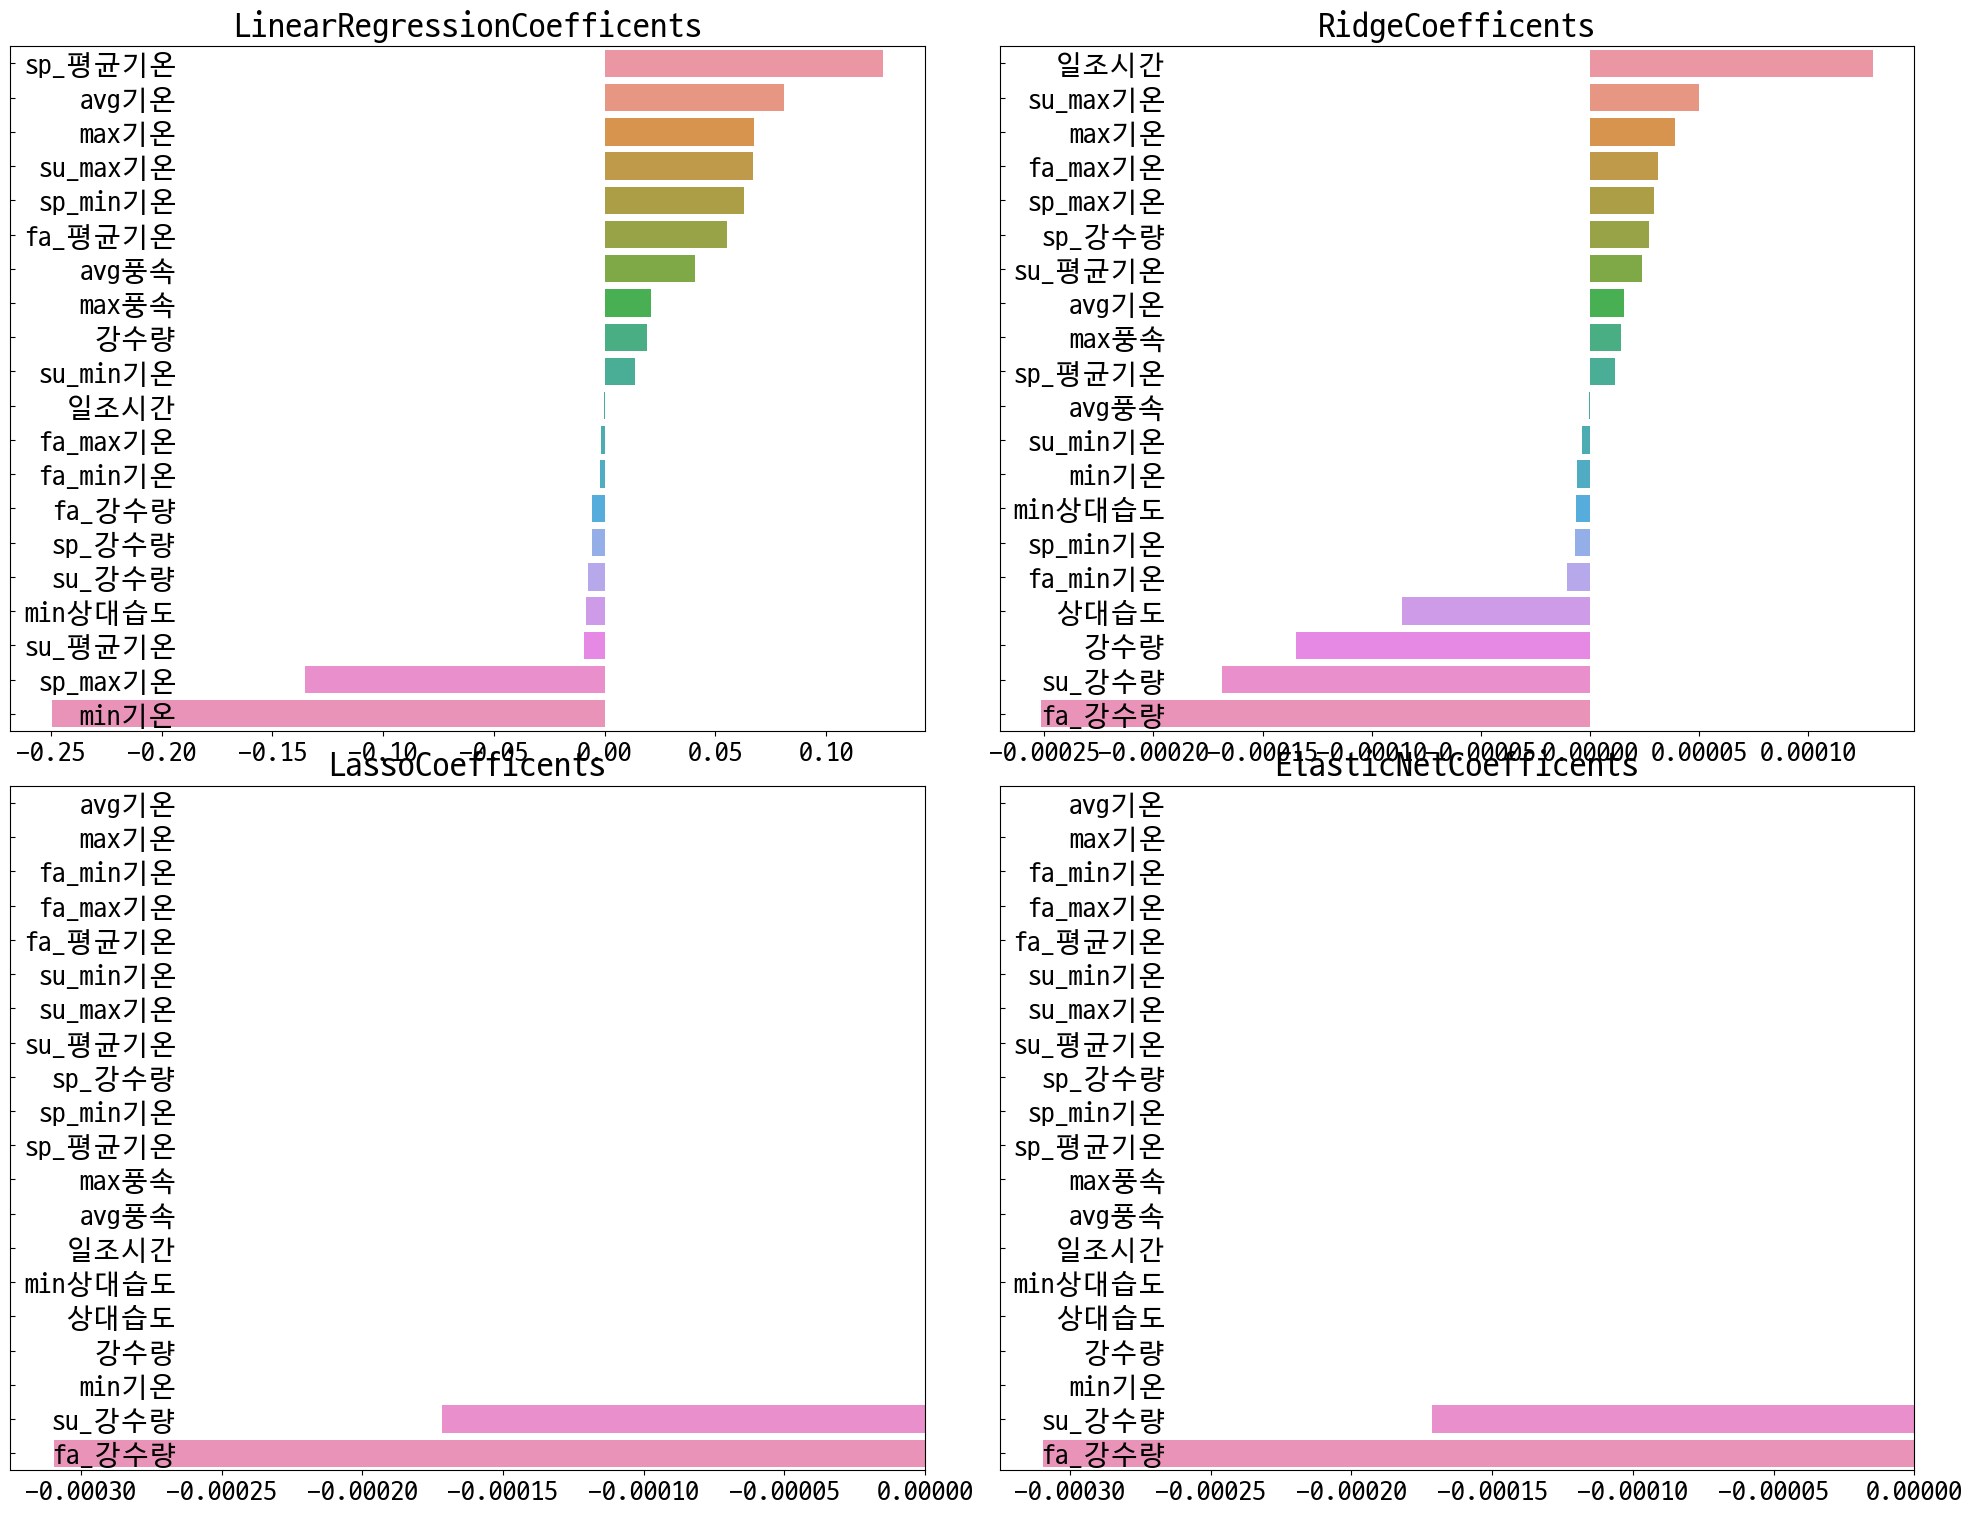

In [26]:
models = [lr_reg, ridge_reg, lasso_reg, eln_reg]
visualize_coef(models)

# 예측결과 혼합

In [27]:
def get_rmse_pred(preds):
    for key in preds.keys():
        pred_value = preds[key]
        mse = mean_squared_error(y_test, pred_value)
        rmse = np.sqrt(mse)
        print(f'{key} 모델의 RMSE: {rmse:.4f}')

In [28]:
ridge_reg = Ridge(alpha=500000)
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso(alpha=0.67)
lasso_reg.fit(X_train, y_train)
eln_reg = ElasticNet(alpha=1.1, l1_ratio=0.61)
eln_reg.fit(X_train, y_train)

ridge_pred = ridge_reg.predict(X_test)
lasso_pred = lasso_reg.predict(X_test)
eln_pred = eln_reg.predict(X_test)

pred = 0.4 * ridge_pred + 0.3 * lasso_pred + 0.3 * eln_pred
preds = {'최종혼합':pred, 'Ridge':ridge_pred, 'Lasso':lasso_pred, 'ElasticNet':eln_pred}

get_rmse_pred(preds)

최종혼합 모델의 RMSE: 0.1923
Ridge 모델의 RMSE: 0.1917
Lasso 모델의 RMSE: 0.1927
ElasticNet 모델의 RMSE: 0.1927


In [29]:
result = pd.concat([pd.DataFrame(np.expm1(pred)), np.expm1(y_test).reset_index(drop=True)], axis=1)

In [30]:
result['error'] = result.iloc[:,0] - result.iloc[:,1]

In [31]:
result

,0,단위생산량,error
0,1785.988593,1657.0,128.988593
1,1798.008732,2957.1,-1159.091268
2,1806.536283,1235.6,570.936283
3,1733.145140,1483.3,249.845140
4,1730.572593,2274.6,-544.027407
5,1779.696298,2051.5,-271.803702
6,1788.705128,2022.6,-233.894872
7,1832.138104,1938.9,-106.761896
8,1807.701924,1848.0,-40.298076
9,1713.241563,1206.8,506.441563


# LinearRegression 모델의 향후 예측

## 강원도 예측

In [32]:
X_test = pd.read_csv('data/gangwonchange.csv', encoding='cp949')

year = X_test['년']

X_test.drop(columns='년', inplace=True)

In [33]:
X_test[['min상대습도', 'avg풍속']] = np.log1p(X_test[['min상대습도', 'avg풍속']])

In [34]:
ridge_pred = ridge_reg.predict(X_test)
lasso_pred = lasso_reg.predict(X_test)
eln_pred = eln_reg.predict(X_test)

pred = 0.4 * ridge_pred + 0.3 * lasso_pred + 0.3 * eln_pred

In [35]:
predict = pd.DataFrame(np.expm1(pred))

predict['년'] = year

predict.columns = ['예상', '년']

predict

,예상,년
0,1865.146741,2001~2010
1,1886.624686,2021~2030
2,1865.844690,2031~2040
3,1883.581774,2041~2050
4,1894.905091,2051~2060
5,1861.658269,2061~2070
6,1861.020140,2071~2080
7,1855.493360,2081~2090
8,1871.958072,2091~2100


In [36]:
import matplotlib.pyplot as plt

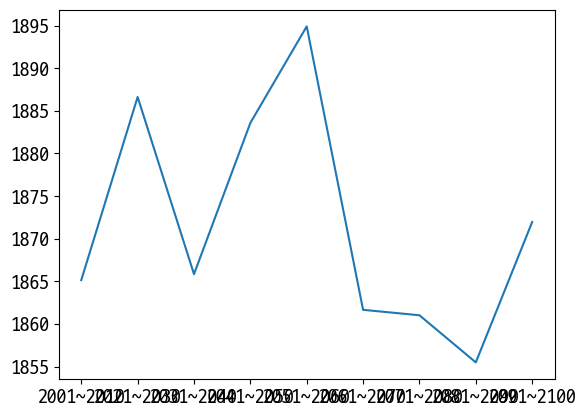

In [37]:
plt.plot(predict['년'], predict['예상'])

In [38]:
predict.to_csv('data/predict/gangwon_li.csv', encoding='cp949', index=False)

## 충남 예측

In [39]:
X_test = pd.read_csv('data/chungnamchange.csv', encoding='cp949')

year = X_test['년']

X_test.drop(columns='년', inplace=True)

In [40]:
X_test[['min상대습도', 'avg풍속']] = np.log1p(X_test[['min상대습도', 'avg풍속']])

In [41]:
ridge_pred = ridge_reg.predict(X_test)
lasso_pred = lasso_reg.predict(X_test)
eln_pred = eln_reg.predict(X_test)

pred = 0.4 * ridge_pred + 0.3 * lasso_pred + 0.3 * eln_pred

In [42]:
predict = pd.DataFrame(np.expm1(pred))

predict['년'] = year

predict.columns = ['예상', '년']

predict

,예상,년
0,1671.344840,2001~2010
1,1694.020893,2021~2030
2,1663.757582,2031~2040
3,1681.265104,2041~2050
4,1690.935361,2051~2060
5,1669.553261,2061~2070
6,1665.132818,2071~2080
7,1653.408425,2081~2090
8,1669.835248,2091~2100


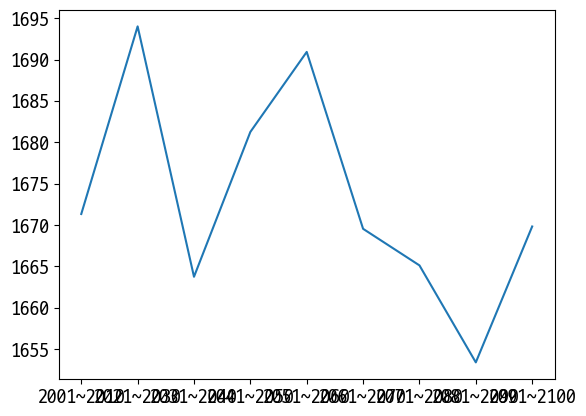

In [43]:
plt.plot(predict['년'], predict['예상'])

In [44]:
predict.to_csv('data/predict/chungnam_li.csv', encoding='cp949', index=False)

## 경북 예측

In [45]:
X_test = pd.read_csv('data/gyeongbukchange.csv', encoding='cp949')

year = X_test['년']

X_test.drop(columns='년', inplace=True)

In [46]:
X_test[['min상대습도', 'avg풍속']] = np.log1p(X_test[['min상대습도', 'avg풍속']])

In [47]:
ridge_pred = ridge_reg.predict(X_test)
lasso_pred = lasso_reg.predict(X_test)
eln_pred = eln_reg.predict(X_test)

pred = 0.4 * ridge_pred + 0.3 * lasso_pred + 0.3 * eln_pred

In [48]:
predict = pd.DataFrame(np.expm1(pred))

predict['년'] = year

predict.columns = ['예상', '년']

predict

,예상,년
0,1651.520233,2001~2010
1,1670.947775,2021~2030
2,1637.754129,2031~2040
3,1661.610903,2041~2050
4,1667.411511,2051~2060
5,1657.437306,2061~2070
6,1648.897334,2071~2080
7,1626.819632,2081~2090
8,1648.008565,2091~2100


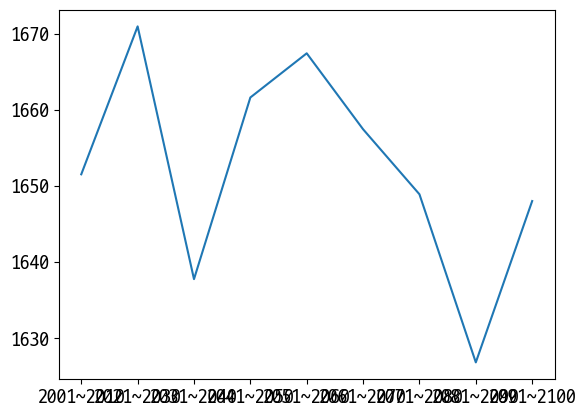

In [49]:
plt.plot(predict['년'], predict['예상'])

In [50]:
predict.to_csv('data/predict/gyeongbuk_li.csv', encoding='cp949', index=False)